In [47]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
data_test = pd.read_csv('test.csv')

# ลบคอลัมน์ Employee ID
data_test = data_test.drop(['Employee ID'], axis=1)

data_train = pd.read_csv('train.csv')

data_train = data_train.drop(['Employee ID'], axis=1)

# แสดงผล DataFrame ที่ลบคอลัมน์แล้ว
print(data_test)
print(data_train)

       Age  Gender  Years at Company    Job Role  Monthly Income  \
0       36    Male                13  Healthcare            8029   
1       35    Male                 7   Education            4563   
2       50    Male                 7   Education            5583   
3       58    Male                44       Media            5525   
4       39    Male                24   Education            4604   
...    ...     ...               ...         ...             ...   
14895   56  Female                42  Healthcare            7830   
14896   30  Female                15   Education            3856   
14897   52    Male                 5   Education            5654   
14898   18    Male                 4   Education            5276   
14899   59  Female                48   Education            3774   

      Work-Life Balance Job Satisfaction Performance Rating  \
0             Excellent             High            Average   
1                  Good             High            Avera

In [49]:
#Check DATA
print(len(data_test), len(data_train))
data_test.info()
data_train.info()

14900 59598
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14900 entries, 0 to 14899
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       14900 non-null  int64 
 1   Gender                    14900 non-null  object
 2   Years at Company          14900 non-null  int64 
 3   Job Role                  14900 non-null  object
 4   Monthly Income            14900 non-null  int64 
 5   Work-Life Balance         14900 non-null  object
 6   Job Satisfaction          14900 non-null  object
 7   Performance Rating        14900 non-null  object
 8   Number of Promotions      14900 non-null  int64 
 9   Overtime                  14900 non-null  object
 10  Distance from Home        14900 non-null  int64 
 11  Education Level           14900 non-null  object
 12  Marital Status            14900 non-null  object
 13  Number of Dependents      14900 non-null  int64 
 14  Job Level 

In [50]:
data = pd.concat([data_train, data_test], axis=0)
data.reset_index(drop=True, inplace=True)

In [51]:
print("data",data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       74498 non-null  int64 
 1   Gender                    74498 non-null  object
 2   Years at Company          74498 non-null  int64 
 3   Job Role                  74498 non-null  object
 4   Monthly Income            74498 non-null  int64 
 5   Work-Life Balance         74498 non-null  object
 6   Job Satisfaction          74498 non-null  object
 7   Performance Rating        74498 non-null  object
 8   Number of Promotions      74498 non-null  int64 
 9   Overtime                  74498 non-null  object
 10  Distance from Home        74498 non-null  int64 
 11  Education Level           74498 non-null  object
 12  Marital Status            74498 non-null  object
 13  Number of Dependents      74498 non-null  int64 
 14  Job Level             

In [52]:
data['Attrition'].value_counts()

Attrition
Stayed    39128
Left      35370
Name: count, dtype: int64

In [53]:
data['Age'].describe()

count    74498.000000
mean        38.529746
std         12.083456
min         18.000000
25%         28.000000
50%         39.000000
75%         49.000000
max         59.000000
Name: Age, dtype: float64

In [54]:
data['Gender'].value_counts()

Gender
Male      40826
Female    33672
Name: count, dtype: int64

In [55]:
data['Years at Company'].describe()

count    74498.000000
mean        15.721603
std         11.223744
min          1.000000
25%          7.000000
50%         13.000000
75%         23.000000
max         51.000000
Name: Years at Company, dtype: float64

In [56]:
data['Years at Company'].value_counts()

Years at Company
5     3084
1     3056
2     3039
8     3015
10    2987
9     2965
3     2961
6     2952
7     2933
4     2903
11    2893
12    2758
13    2547
14    2349
15    2281
16    2145
17    1994
18    1889
19    1754
20    1729
21    1606
23    1557
22    1537
24    1385
25    1273
26    1255
27    1207
28    1098
29    1057
30     998
31     943
32     872
33     817
34     759
36     664
35     638
37     584
38     560
39     532
40     470
41     433
42     372
43     340
45     300
44     266
46     223
47     180
48     144
49     106
50      55
51      33
Name: count, dtype: int64

In [57]:
data['Job Role'].value_counts()

Job Role
Technology    19322
Healthcare    17074
Education     15658
Media         11996
Finance       10448
Name: count, dtype: int64

In [58]:
def classify_birth_year_group(gen):
  birth_year = 2024 - gen
  if birth_year >= 2013:
      return 'Gen_Alpha'
  elif 1995 <= birth_year <= 2012:
      return 'Gen_Z'
  elif 1980 <= birth_year <= 1994:
      return 'Gen_Y'
  elif 1965 <= birth_year <= 1979:
      return 'Gen_X'
  else:
      return 'Baby_Boomer'


data['Generation'] = data['Age'].apply(classify_birth_year_group)

data

# X11 = Prepro_Data[['Generation']]

Age  Gender  Years at Company    Job Role  Monthly Income  \
0       31    Male                19   Education            5390   
1       59  Female                 4       Media            5534   
2       24  Female                10  Healthcare            8159   
3       36  Female                 7   Education            3989   
4       56    Male                41   Education            4821   
...    ...     ...               ...         ...             ...   
74493   56  Female                42  Healthcare            7830   
74494   30  Female                15   Education            3856   
74495   52    Male                 5   Education            5654   
74496   18    Male                 4   Education            5276   
74497   59  Female                48   Education            3774   

      Work-Life Balance Job Satisfaction Performance Rating  \
0             Excellent           Medium            Average   
1                  Poor             High                Low   
2                  Good             High                Low   
3                  Good             High               High   
4                  Fair        Very High            Average   
...                 ...              ...                ...   
74493              Poor           Medium            Average   
74494              Good           Medium            Average   
74495              Good        Very High      Below Average   
74496              Fair             High            Average   
74497              Good             High      Below Average   

       Number of Promotions Overtime  ...  Job Level Company Size  \
0                         2       No  ...        Mid       Medium   
1                         3       No  ...        Mid       Medium   
2                         0       No  ...        Mid       Medium   
3                         1       No  ...        Mid        Small   
4                         0      Yes  ...     Senior       Medium   
...                     ...      ...  ...        ...          ...   
74493                     0      Yes  ...     Senior       Medium   
74494                     2      Yes  ...      Entry       Medium   
74495                     0       No  ...        Mid        Small   
74496                     0       No  ...        Mid        Large   
74497                     1       No  ...        Mid        Large   

      Company Tenure  Remote Work Leadership Opportunities  \
0                 89           No                       No   
1                 21           No                       No   
2                 74           No                       No   
3                 50          Yes                       No   
4                 68           No                       No   
...              ...          ...                      ...   
74493             60           No                       No   
74494             20           No                       No   
74495              7           No                       No   
74496              5           No                       No   
74497            118           No                       No   

      Innovation Opportunities  Company Reputation Employee Recognition  \
0                           No           Excellent               Medium   
1                           No                Fair                  Low   
2                           No                Poor                  Low   
3                           No                Good               Medium   
4                           No                Fair               Medium   
...                        ...                 ...                  ...   
74493                       No                Poor               Medium   
74494                       No                Good               Medium   
74495                       No                Good                 High   
74496                       No                Poor                 High   
74497                       No    

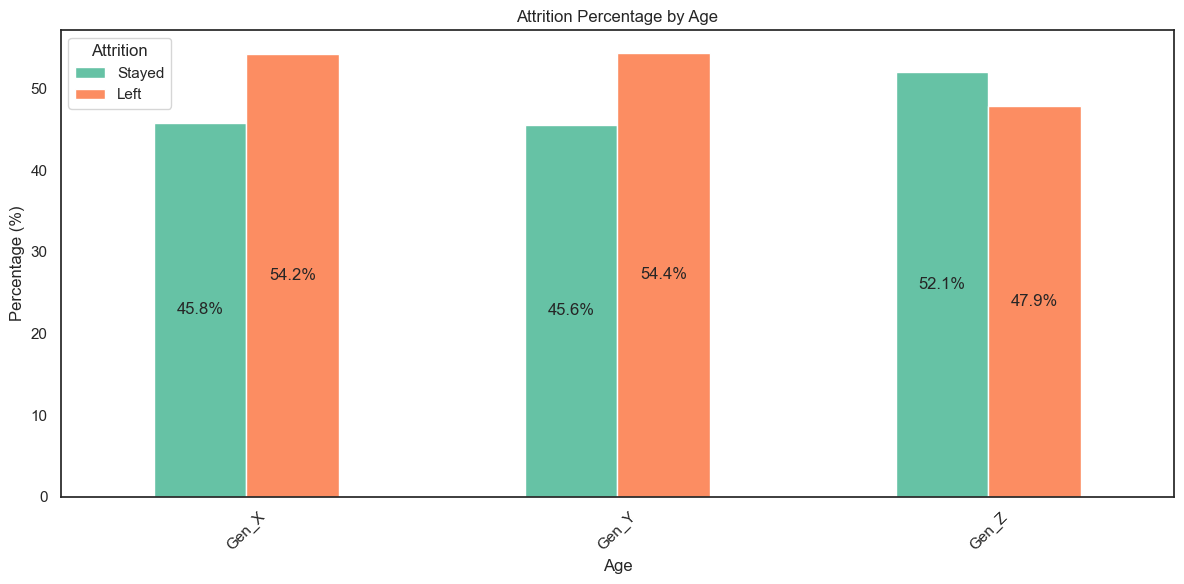

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# เลือกเฉพาะฟีเจอร์ที่เกี่ยวข้อง
Reside_stroke = data[['Generation', 'Attrition']]

# สร้าง Figure และ Axes
fig, ax = plt.subplots(figsize=(12, 6))

# นับจำนวนตามช่วงอายุและสถานะ Attrition
Reside_stroke_counts = Reside_stroke.groupby(['Generation', 'Attrition']).size().unstack()  # Pivot ค่า Attrition
Reside_stroke_totals = Reside_stroke_counts.sum(axis=1)  # ผลรวมแต่ละช่วงอายุ
Reside_stroke_percent = Reside_stroke_counts.div(Reside_stroke_totals, axis=0) * 100  # คำนวณเป็นเปอร์เซ็นต์

# วาดกราฟแท่งแบบซ้อนกัน
ax = Reside_stroke_percent.plot(kind='bar', ax=ax, color=sns.color_palette('Set2'))

# เพิ่ม Bar Labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')

# ตั้งค่ากราฟ
plt.title('Attrition Percentage by Age')
plt.xlabel('Age')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.legend(title='Attrition', labels=['Stayed', 'Left'])
plt.tight_layout()

# แสดงกราฟ
plt.show()


In [60]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
# จัดการข้อมูล
continuous_cols = ['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions', 'Distance from Home', 'Company Tenure']
scaler = StandardScaler()
data[continuous_cols] = scaler.fit_transform(data[continuous_cols])

In [61]:
data['Age'].describe(),  data['Age'].value_counts()

(count    7.449800e+04
 mean     2.114517e-16
 std      1.000007e+00
 min     -1.699008e+00
 25%     -8.714242e-01
 50%      3.891746e-02
 75%      8.665008e-01
 max      1.694084e+00
 Name: Age, dtype: float64,
 Age
 -0.374874    1875
  0.121676    1861
  1.197534    1843
  0.535467    1842
 -0.043841    1834
  1.363051    1824
  0.369951    1822
 -0.705908    1818
  0.038917    1813
  0.700984    1806
 -0.292116    1806
 -0.209358    1795
  0.618226    1793
 -0.457633    1791
 -1.616249    1789
 -0.540391    1788
  1.445809    1787
  0.866501    1786
 -1.367974    1784
 -1.450733    1781
  1.694084    1779
 -0.954183    1779
 -1.533491    1776
  0.204434    1772
  0.287192    1766
 -1.036941    1761
  1.611326    1760
  1.528567    1753
 -1.119699    1739
 -1.202458    1736
  1.280292    1736
 -0.126599    1732
 -0.788666    1730
 -0.623149    1728
  1.032017    1725
 -0.871424    1724
  0.452709    1723
  0.949259    1718
 -1.285216    1711
  1.114776    1708
  0.783742    1702
 -1.

In [62]:
label_encoder = LabelEncoder()
data['Attrition'] = label_encoder.fit_transform(data['Attrition'])

In [63]:
data['Attrition'].value_counts()

Attrition
1    39128
0    35370
Name: count, dtype: int64

In [64]:
print(data.columns)


Index(['Age', 'Gender', 'Years at Company', 'Job Role', 'Monthly Income',
       'Work-Life Balance', 'Job Satisfaction', 'Performance Rating',
       'Number of Promotions', 'Overtime', 'Distance from Home',
       'Education Level', 'Marital Status', 'Number of Dependents',
       'Job Level', 'Company Size', 'Company Tenure', 'Remote Work',
       'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition', 'Attrition',
       'Generation'],
      dtype='object')


In [65]:
# คอลัมน์ที่เป็นตัวแปรประเภท categorical ที่ต้องการทำ One-Hot Encoding
categorical_cols = ['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction', 
                    'Performance Rating', 'Marital Status', 'Education Level', 
                    'Job Level', 'Company Size', 'Remote Work', 
                    'Leadership Opportunities', 'Innovation Opportunities', 
                    'Company Reputation', 'Employee Recognition', 'Overtime']

# ทำ One-Hot Encoding โดยใช้ pd.get_dummies()
data = pd.get_dummies(data, columns=categorical_cols)

# แสดงผลลัพธ์
print(data.head())

        Age  Years at Company  Monthly Income  Number of Promotions  \
0 -0.623149          0.292097       -0.887054              1.172597   
1  1.694084         -1.044365       -0.820155              2.177337   
2 -1.202458         -0.509780        0.399360             -0.836883   
3 -0.209358         -0.777072       -1.537927              0.167857   
4  1.445809          2.252240       -1.151399             -0.836883   

   Distance from Home  Number of Dependents  Company Tenure  Attrition  \
0           -0.981699                     0        1.309985          1   
1           -1.016770                     3       -1.367267          1   
2           -1.367482                     3        0.719415          1   
3           -0.806343                     2       -0.225498          1   
4            0.736790                     0        0.483187          1   

  Generation  Gender_Female  ...  Company Reputation_Excellent  \
0      Gen_Y          False  ...                          True

In [66]:
data = data.drop((['Generation']), axis=1)

In [67]:
print(len(data.columns))
print(data.columns)

57
Index(['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions',
       'Distance from Home', 'Number of Dependents', 'Company Tenure',
       'Attrition', 'Gender_Female', 'Gender_Male', 'Job Role_Education',
       'Job Role_Finance', 'Job Role_Healthcare', 'Job Role_Media',
       'Job Role_Technology', 'Work-Life Balance_Excellent',
       'Work-Life Balance_Fair', 'Work-Life Balance_Good',
       'Work-Life Balance_Poor', 'Job Satisfaction_High',
       'Job Satisfaction_Low', 'Job Satisfaction_Medium',
       'Job Satisfaction_Very High', 'Performance Rating_Average',
       'Performance Rating_Below Average', 'Performance Rating_High',
       'Performance Rating_Low', 'Marital Status_Divorced',
       'Marital Status_Married', 'Marital Status_Single',
       'Education Level_Associate Degree', 'Education Level_Bachelor’s Degree',
       'Education Level_High School', 'Education Level_Master’s Degree',
       'Education Level_PhD', 'Job Level_Entry', 'Job Level_Mid'

In [68]:
print("data",data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 57 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                74498 non-null  float64
 1   Years at Company                   74498 non-null  float64
 2   Monthly Income                     74498 non-null  float64
 3   Number of Promotions               74498 non-null  float64
 4   Distance from Home                 74498 non-null  float64
 5   Number of Dependents               74498 non-null  int64  
 6   Company Tenure                     74498 non-null  float64
 7   Attrition                          74498 non-null  int64  
 8   Gender_Female                      74498 non-null  bool   
 9   Gender_Male                        74498 non-null  bool   
 10  Job Role_Education                 74498 non-null  bool   
 11  Job Role_Finance                   74498 non-null  boo

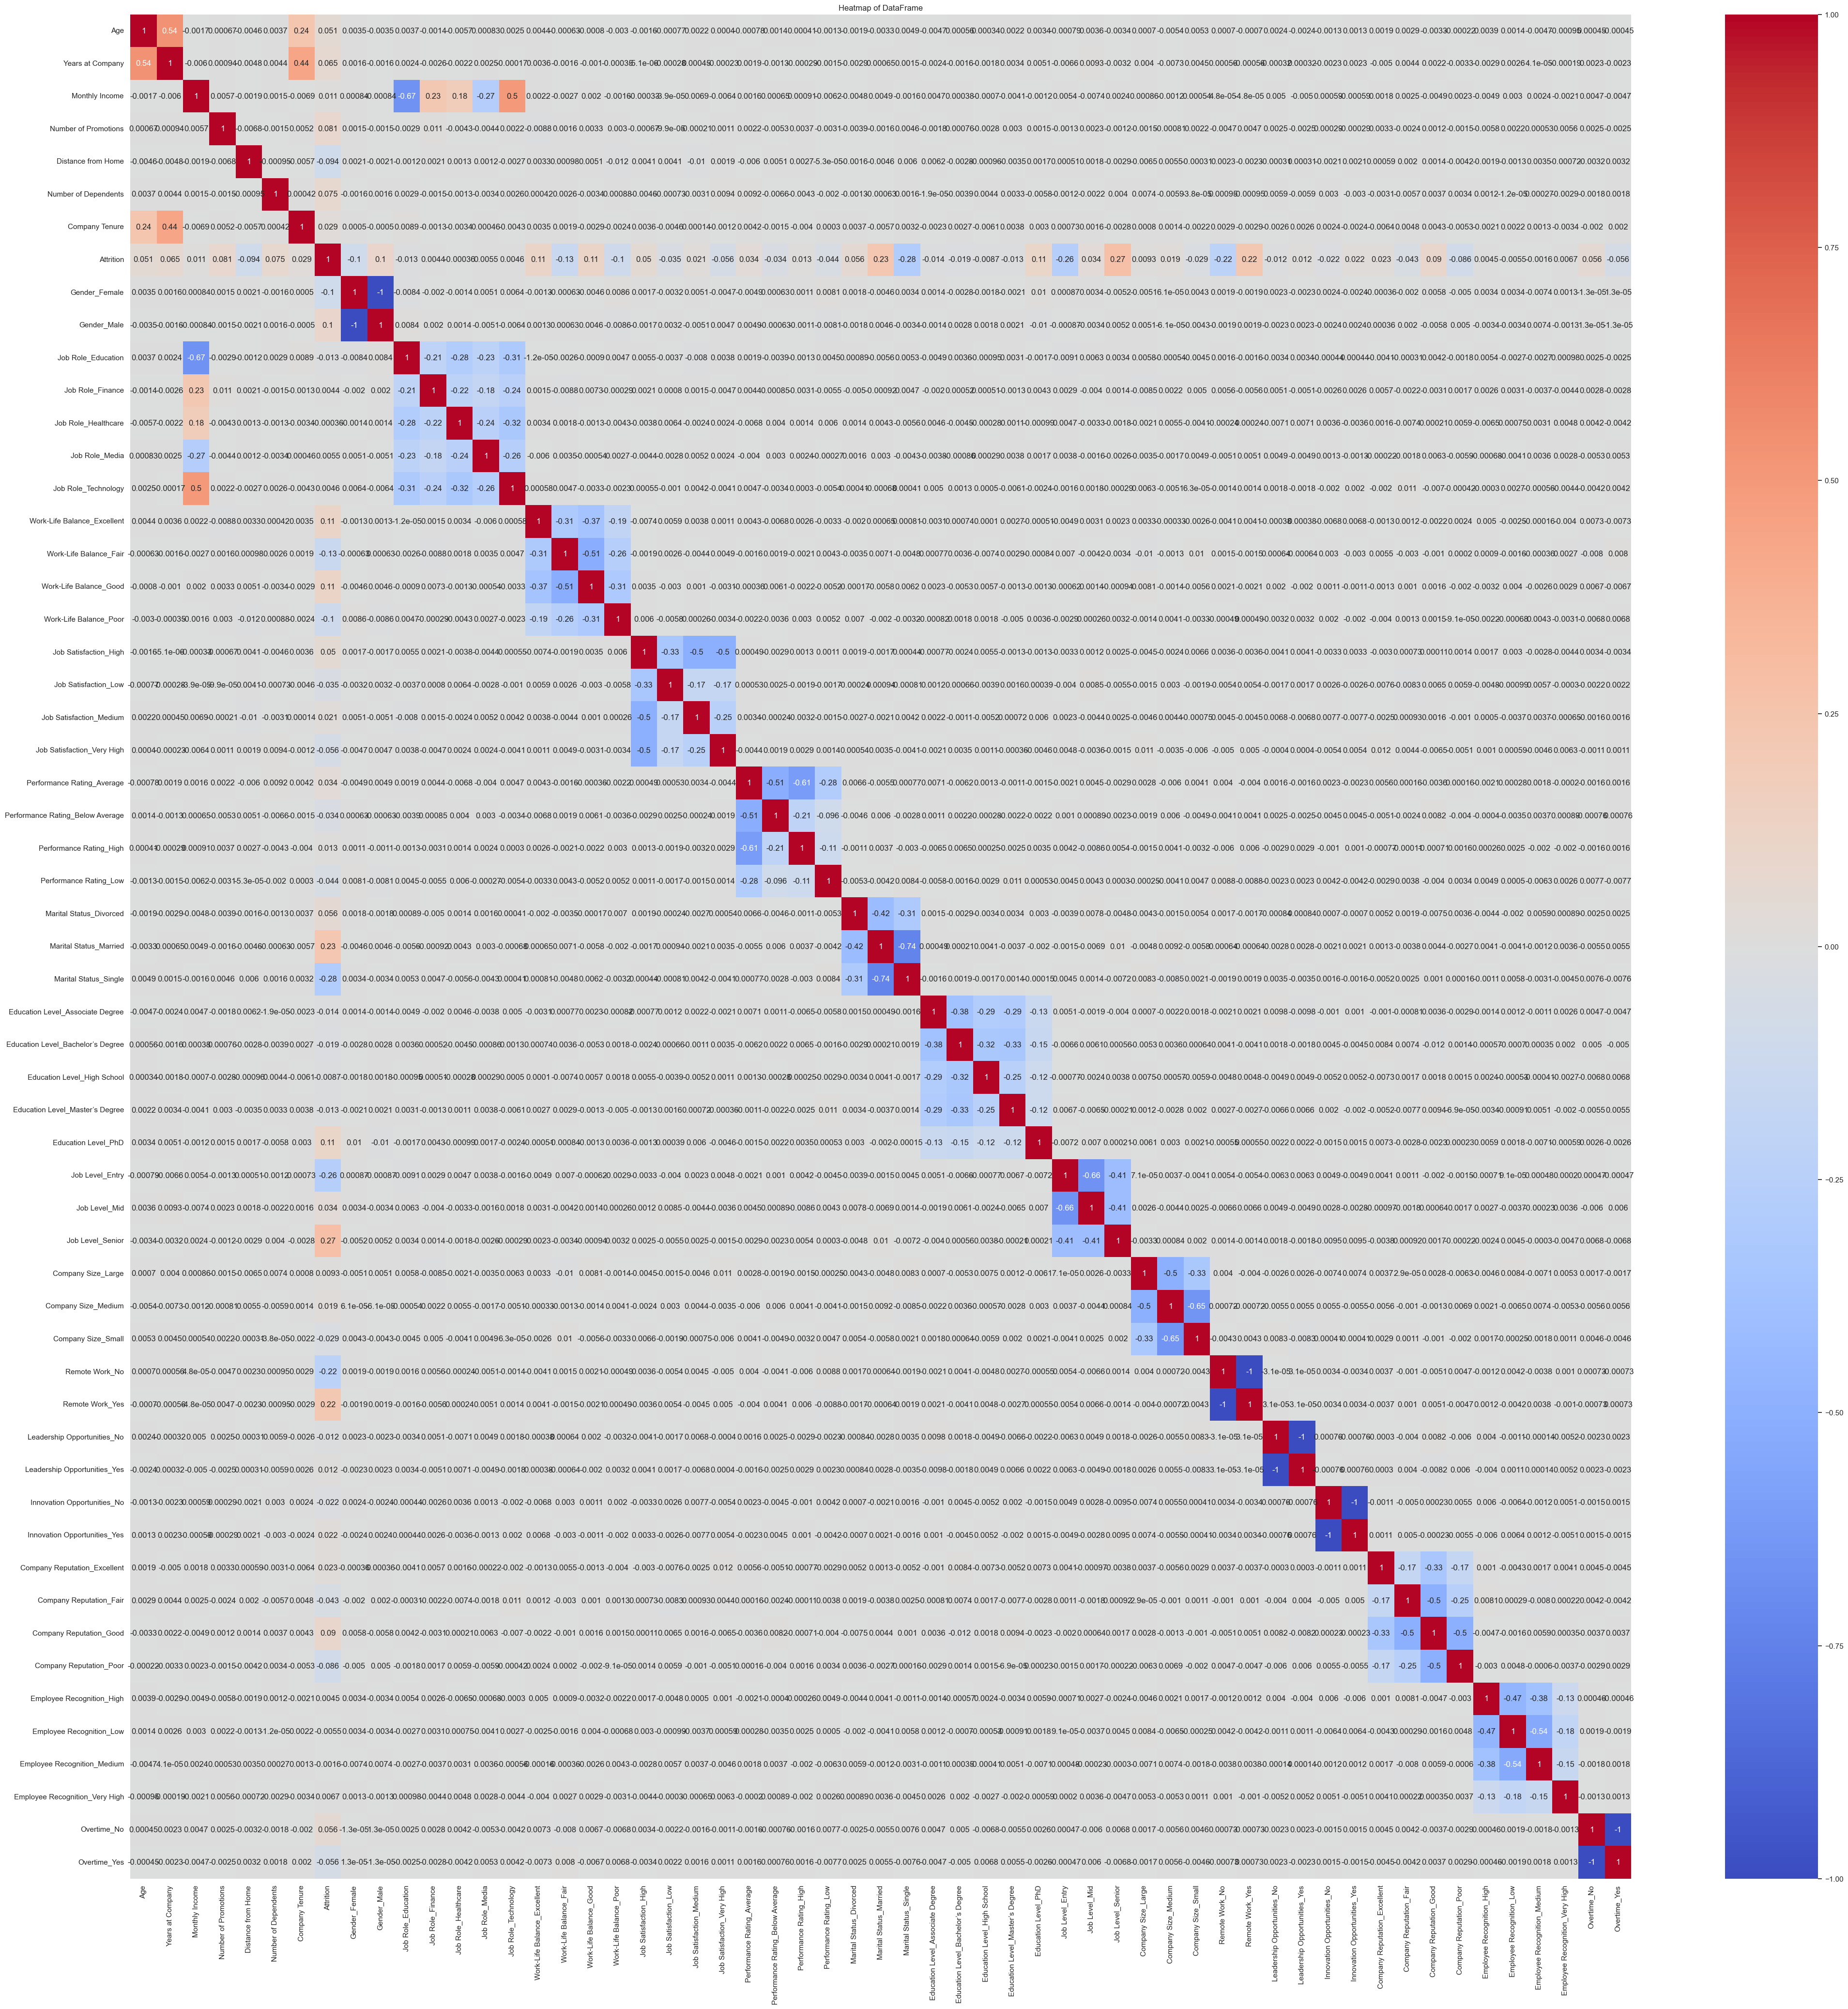

In [69]:
# วาด Heatmap
plt.figure(figsize=(50,50))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of DataFrame')
plt.show()

In [70]:
correlation_data = data.corr()
correlation_data['Attrition'].sort_values()

Marital Status_Single               -0.283057
Job Level_Entry                     -0.258141
Remote Work_No                      -0.221191
Work-Life Balance_Fair              -0.132894
Work-Life Balance_Poor              -0.102334
Gender_Female                       -0.100637
Distance from Home                  -0.093836
Company Reputation_Poor             -0.086308
Overtime_Yes                        -0.056019
Job Satisfaction_Very High          -0.055985
Performance Rating_Low              -0.044012
Company Reputation_Fair             -0.042791
Job Satisfaction_Low                -0.035430
Performance Rating_Below Average    -0.034483
Company Size_Small                  -0.028760
Innovation Opportunities_No         -0.021548
Education Level_Bachelor’s Degree   -0.019288
Education Level_Associate Degree    -0.013829
Education Level_Master’s Degree     -0.013424
Job Role_Education                  -0.013322
Leadership Opportunities_No         -0.011995
Education Level_High School       

C:\Users\bibi\AppData\Local\Temp\ipykernel_10464\1462438068.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_values.values, y=corr_values.index, palette='coolwarm')


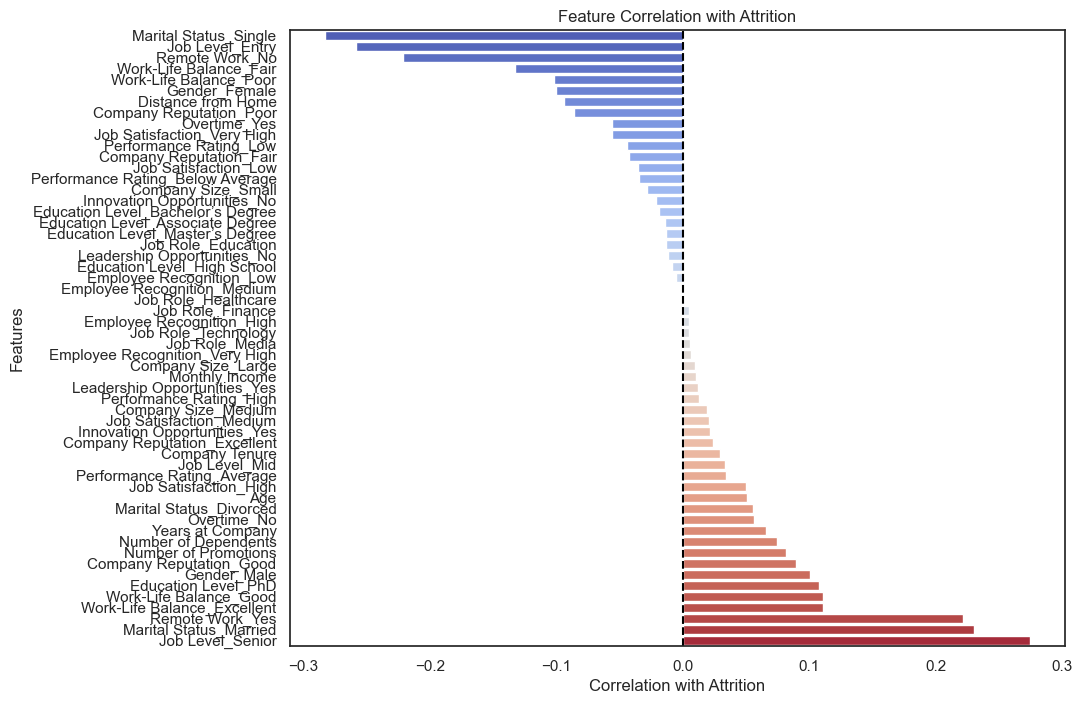

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# คัดลอกค่าความสัมพันธ์ ยกเว้นตัวเอง (Attrition)
corr_values = correlation_data['Attrition'].drop('Attrition')

# เรียงลำดับค่าตามขนาดของ correlation
corr_values = corr_values.sort_values()

# กำหนดขนาดของกราฟ
plt.figure(figsize=(10, 8))

# สร้าง Bar Chart
sns.barplot(x=corr_values.values, y=corr_values.index, palette='coolwarm')
plt.xlabel('Correlation with Attrition')
plt.ylabel('Features')
plt.title('Feature Correlation with Attrition')
plt.axvline(x=0, color='black', linestyle='--')  # เส้นแบ่งค่าบวกกับค่าลบ

plt.show()


In [72]:
data.head(5)

Age  Years at Company  Monthly Income  Number of Promotions  \
0 -0.623149          0.292097       -0.887054              1.172597   
1  1.694084         -1.044365       -0.820155              2.177337   
2 -1.202458         -0.509780        0.399360             -0.836883   
3 -0.209358         -0.777072       -1.537927              0.167857   
4  1.445809          2.252240       -1.151399             -0.836883   

   Distance from Home  Number of Dependents  Company Tenure  Attrition  \
0           -0.981699                     0        1.309985          1   
1           -1.016770                     3       -1.367267          1   
2           -1.367482                     3        0.719415          1   
3           -0.806343                     2       -0.225498          1   
4            0.736790                     0        0.483187          1   

   Gender_Female  Gender_Male  ...  Company Reputation_Excellent  \
0          False         True  ...                          True   
1           True        False  ...                         False   
2           True        False  ...                         False   
3           True        False  ...                         False   
4          False         True  ...                         False   

   Company Reputation_Fair  Company Reputation_Good  Company Reputation_Poor  \
0                    False                    False                    False   
1                     True                    False                    False   
2                    False                    False                     True   
3                    False                     True                    False   
4                     True                    False                    False   

   Employee Recognition_High  Employee Recognition_Low  \
0                      False                     False   
1                      False                      True   
2                      False                      True   
3                      False                     False   
4                      False                     False   

   Employee Recognition_Medium  Employee Recognition_Very High  Overtime_No  \
0                         True                           False         True   
1                        False                           False         True   
2                        False                           False         True   
3                         True                           False         True   
4                         True                           False        False   

   Overtime_Yes  
0         False  
1         False  
2         False  
3         False  
4          True  

[5 rows x 57 columns]

In [73]:
data = data.drop((['Gender_Female', 'Gender_Male' , 'Job Role_Education' ,  'Job Role_Finance', 'Job Role_Healthcare', 'Job Role_Media',
       'Job Role_Technology']), axis=1)
print(data.columns)

Index(['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions',
       'Distance from Home', 'Number of Dependents', 'Company Tenure',
       'Attrition', 'Work-Life Balance_Excellent', 'Work-Life Balance_Fair',
       'Work-Life Balance_Good', 'Work-Life Balance_Poor',
       'Job Satisfaction_High', 'Job Satisfaction_Low',
       'Job Satisfaction_Medium', 'Job Satisfaction_Very High',
       'Performance Rating_Average', 'Performance Rating_Below Average',
       'Performance Rating_High', 'Performance Rating_Low',
       'Marital Status_Divorced', 'Marital Status_Married',
       'Marital Status_Single', 'Education Level_Associate Degree',
       'Education Level_Bachelor’s Degree', 'Education Level_High School',
       'Education Level_Master’s Degree', 'Education Level_PhD',
       'Job Level_Entry', 'Job Level_Mid', 'Job Level_Senior',
       'Company Size_Large', 'Company Size_Medium', 'Company Size_Small',
       'Remote Work_No', 'Remote Work_Yes', 'Leadership Opp

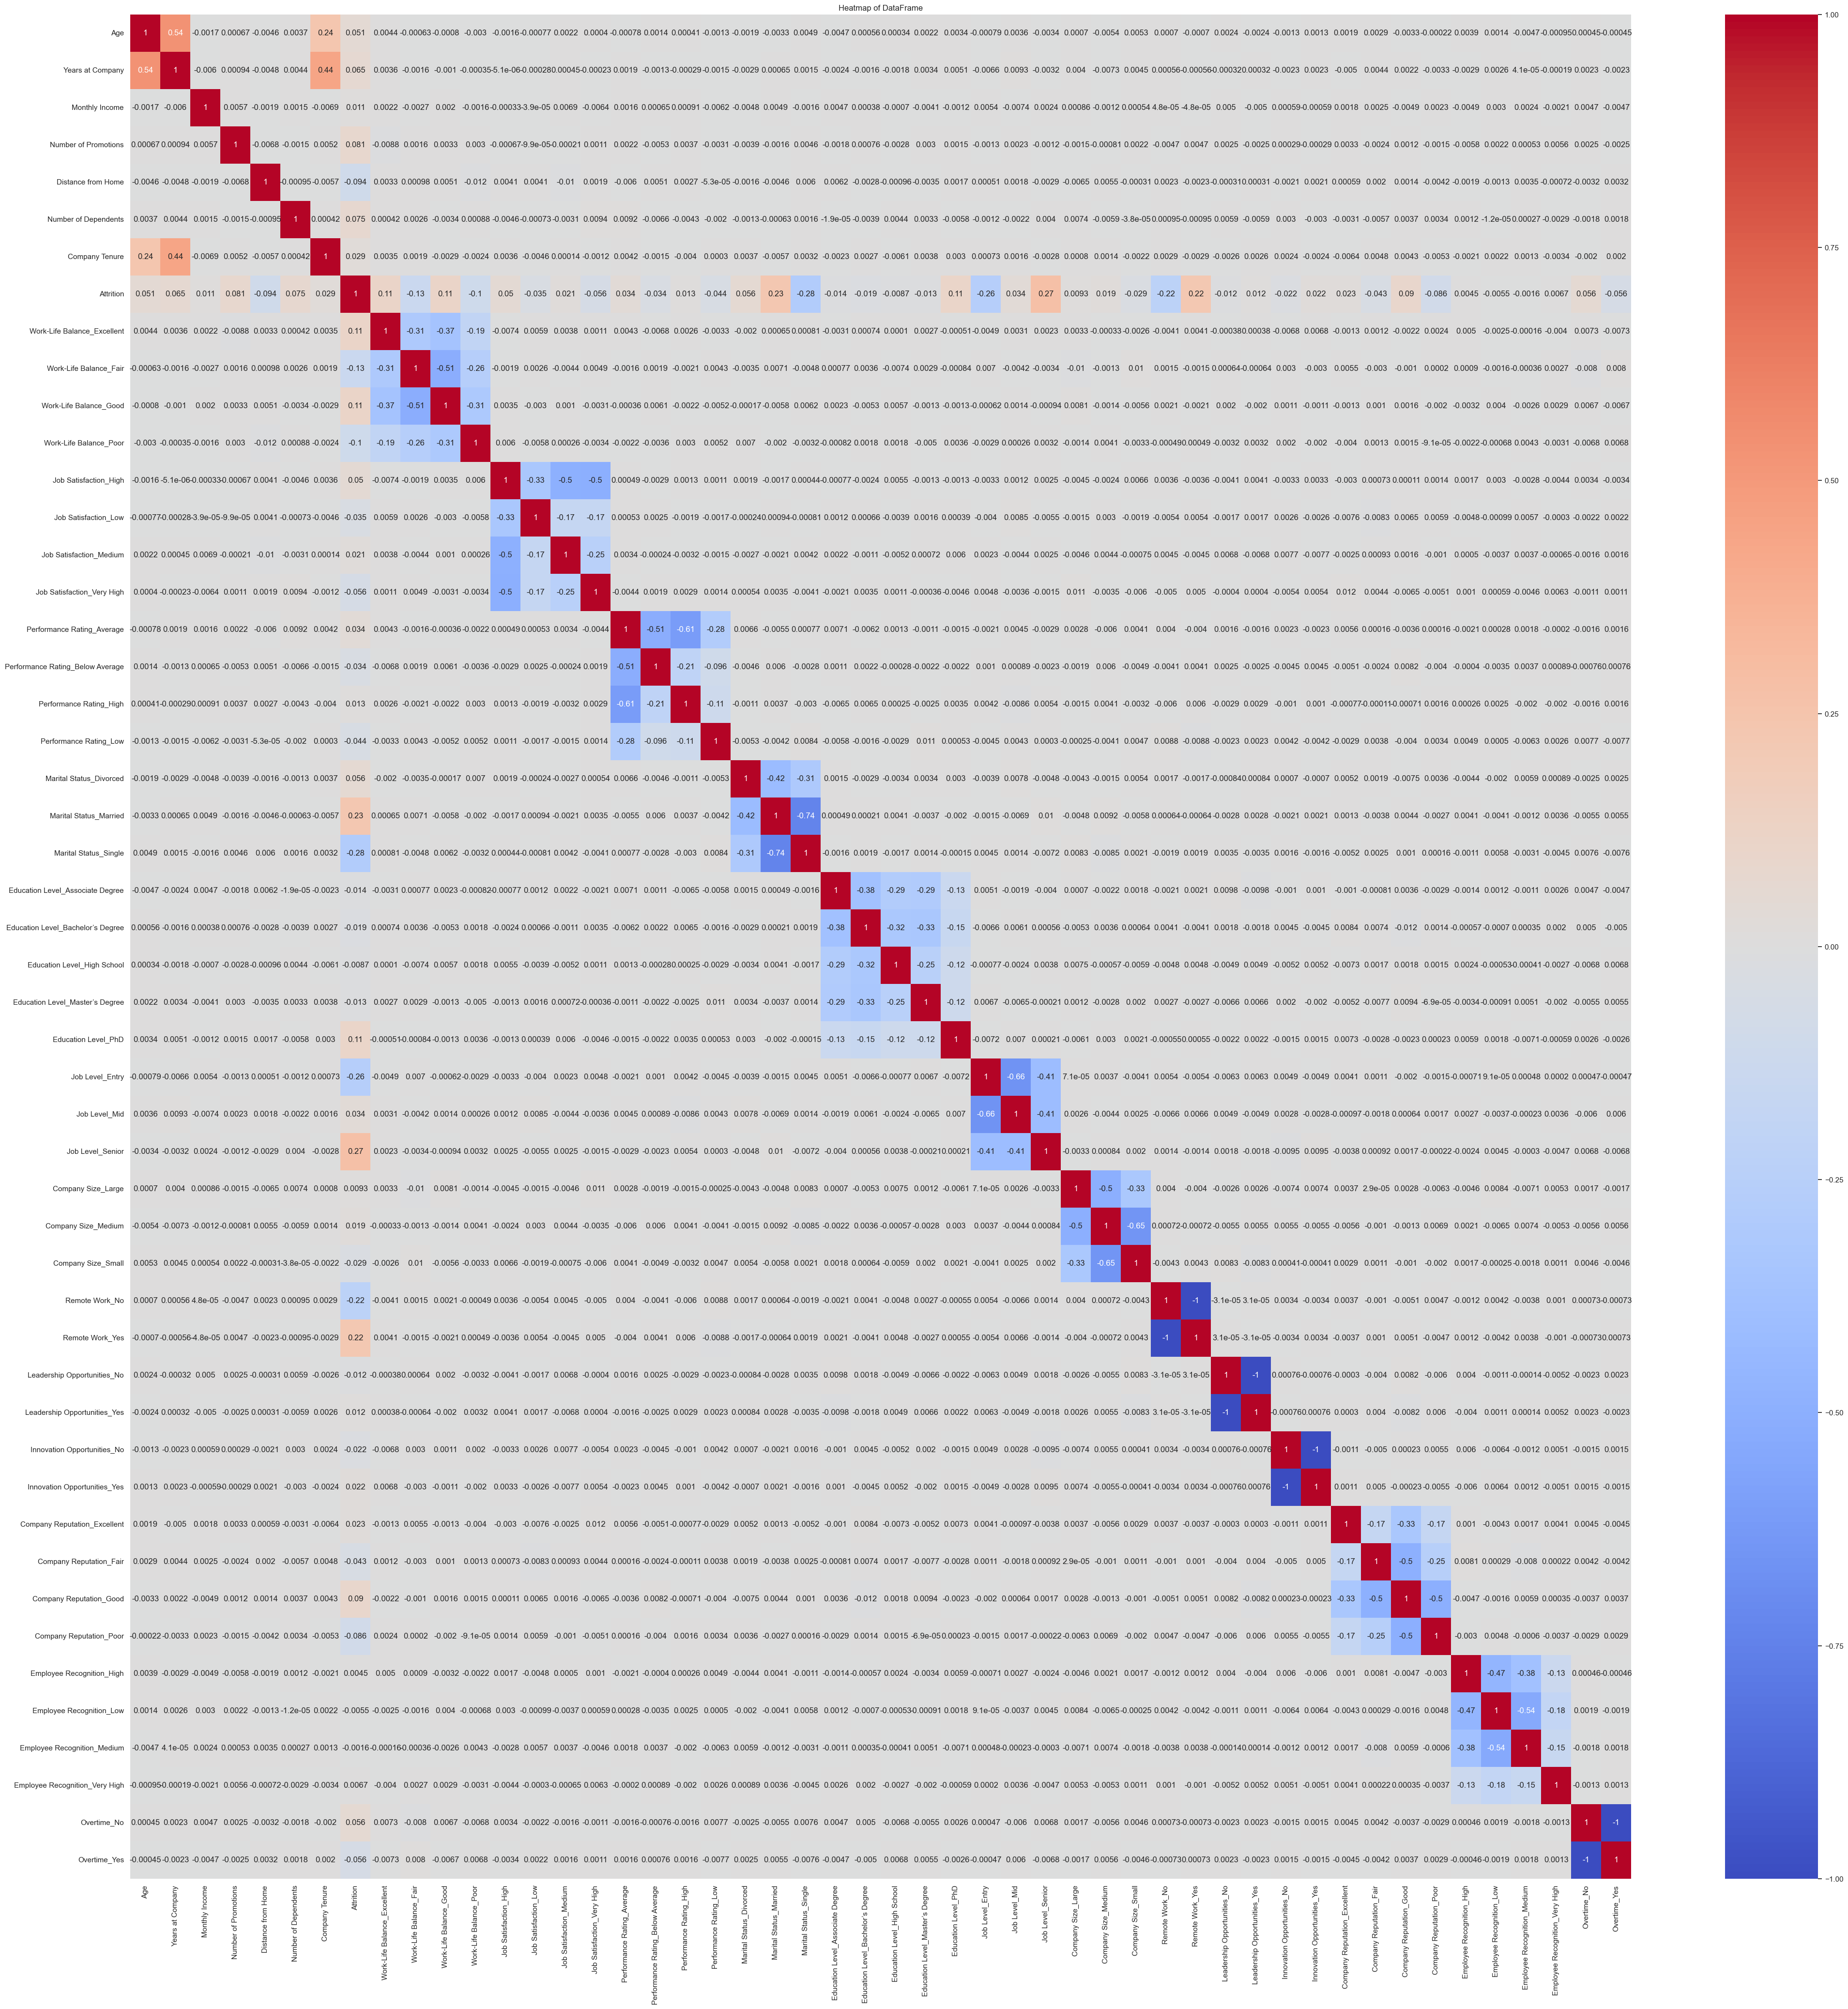

In [74]:
# วาด Heatmap
plt.figure(figsize=(50,50))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of DataFrame')
plt.show()

In [75]:
data = data.drop((['Employee Recognition_Medium' , 'Employee Recognition_Low', 'Employee Recognition_High' ,  'Employee Recognition_Very High' , 'Innovation Opportunities_No',
       'Innovation Opportunities_Yes' , 'Leadership Opportunities_No', 'Leadership Opportunities_Yes' , 'Company Size_Medium', 'Company Size_Small',
       'Remote Work_No', 'Remote Work_Yes' , 'Company Tenure' , 'Monthly Income' , 'Company Size_Large']), axis=1)

In [76]:
print(len(data.columns))
print(data.columns)

35
Index(['Age', 'Years at Company', 'Number of Promotions', 'Distance from Home',
       'Number of Dependents', 'Attrition', 'Work-Life Balance_Excellent',
       'Work-Life Balance_Fair', 'Work-Life Balance_Good',
       'Work-Life Balance_Poor', 'Job Satisfaction_High',
       'Job Satisfaction_Low', 'Job Satisfaction_Medium',
       'Job Satisfaction_Very High', 'Performance Rating_Average',
       'Performance Rating_Below Average', 'Performance Rating_High',
       'Performance Rating_Low', 'Marital Status_Divorced',
       'Marital Status_Married', 'Marital Status_Single',
       'Education Level_Associate Degree', 'Education Level_Bachelor’s Degree',
       'Education Level_High School', 'Education Level_Master’s Degree',
       'Education Level_PhD', 'Job Level_Entry', 'Job Level_Mid',
       'Job Level_Senior', 'Company Reputation_Excellent',
       'Company Reputation_Fair', 'Company Reputation_Good',
       'Company Reputation_Poor', 'Overtime_No', 'Overtime_Yes'],
      d

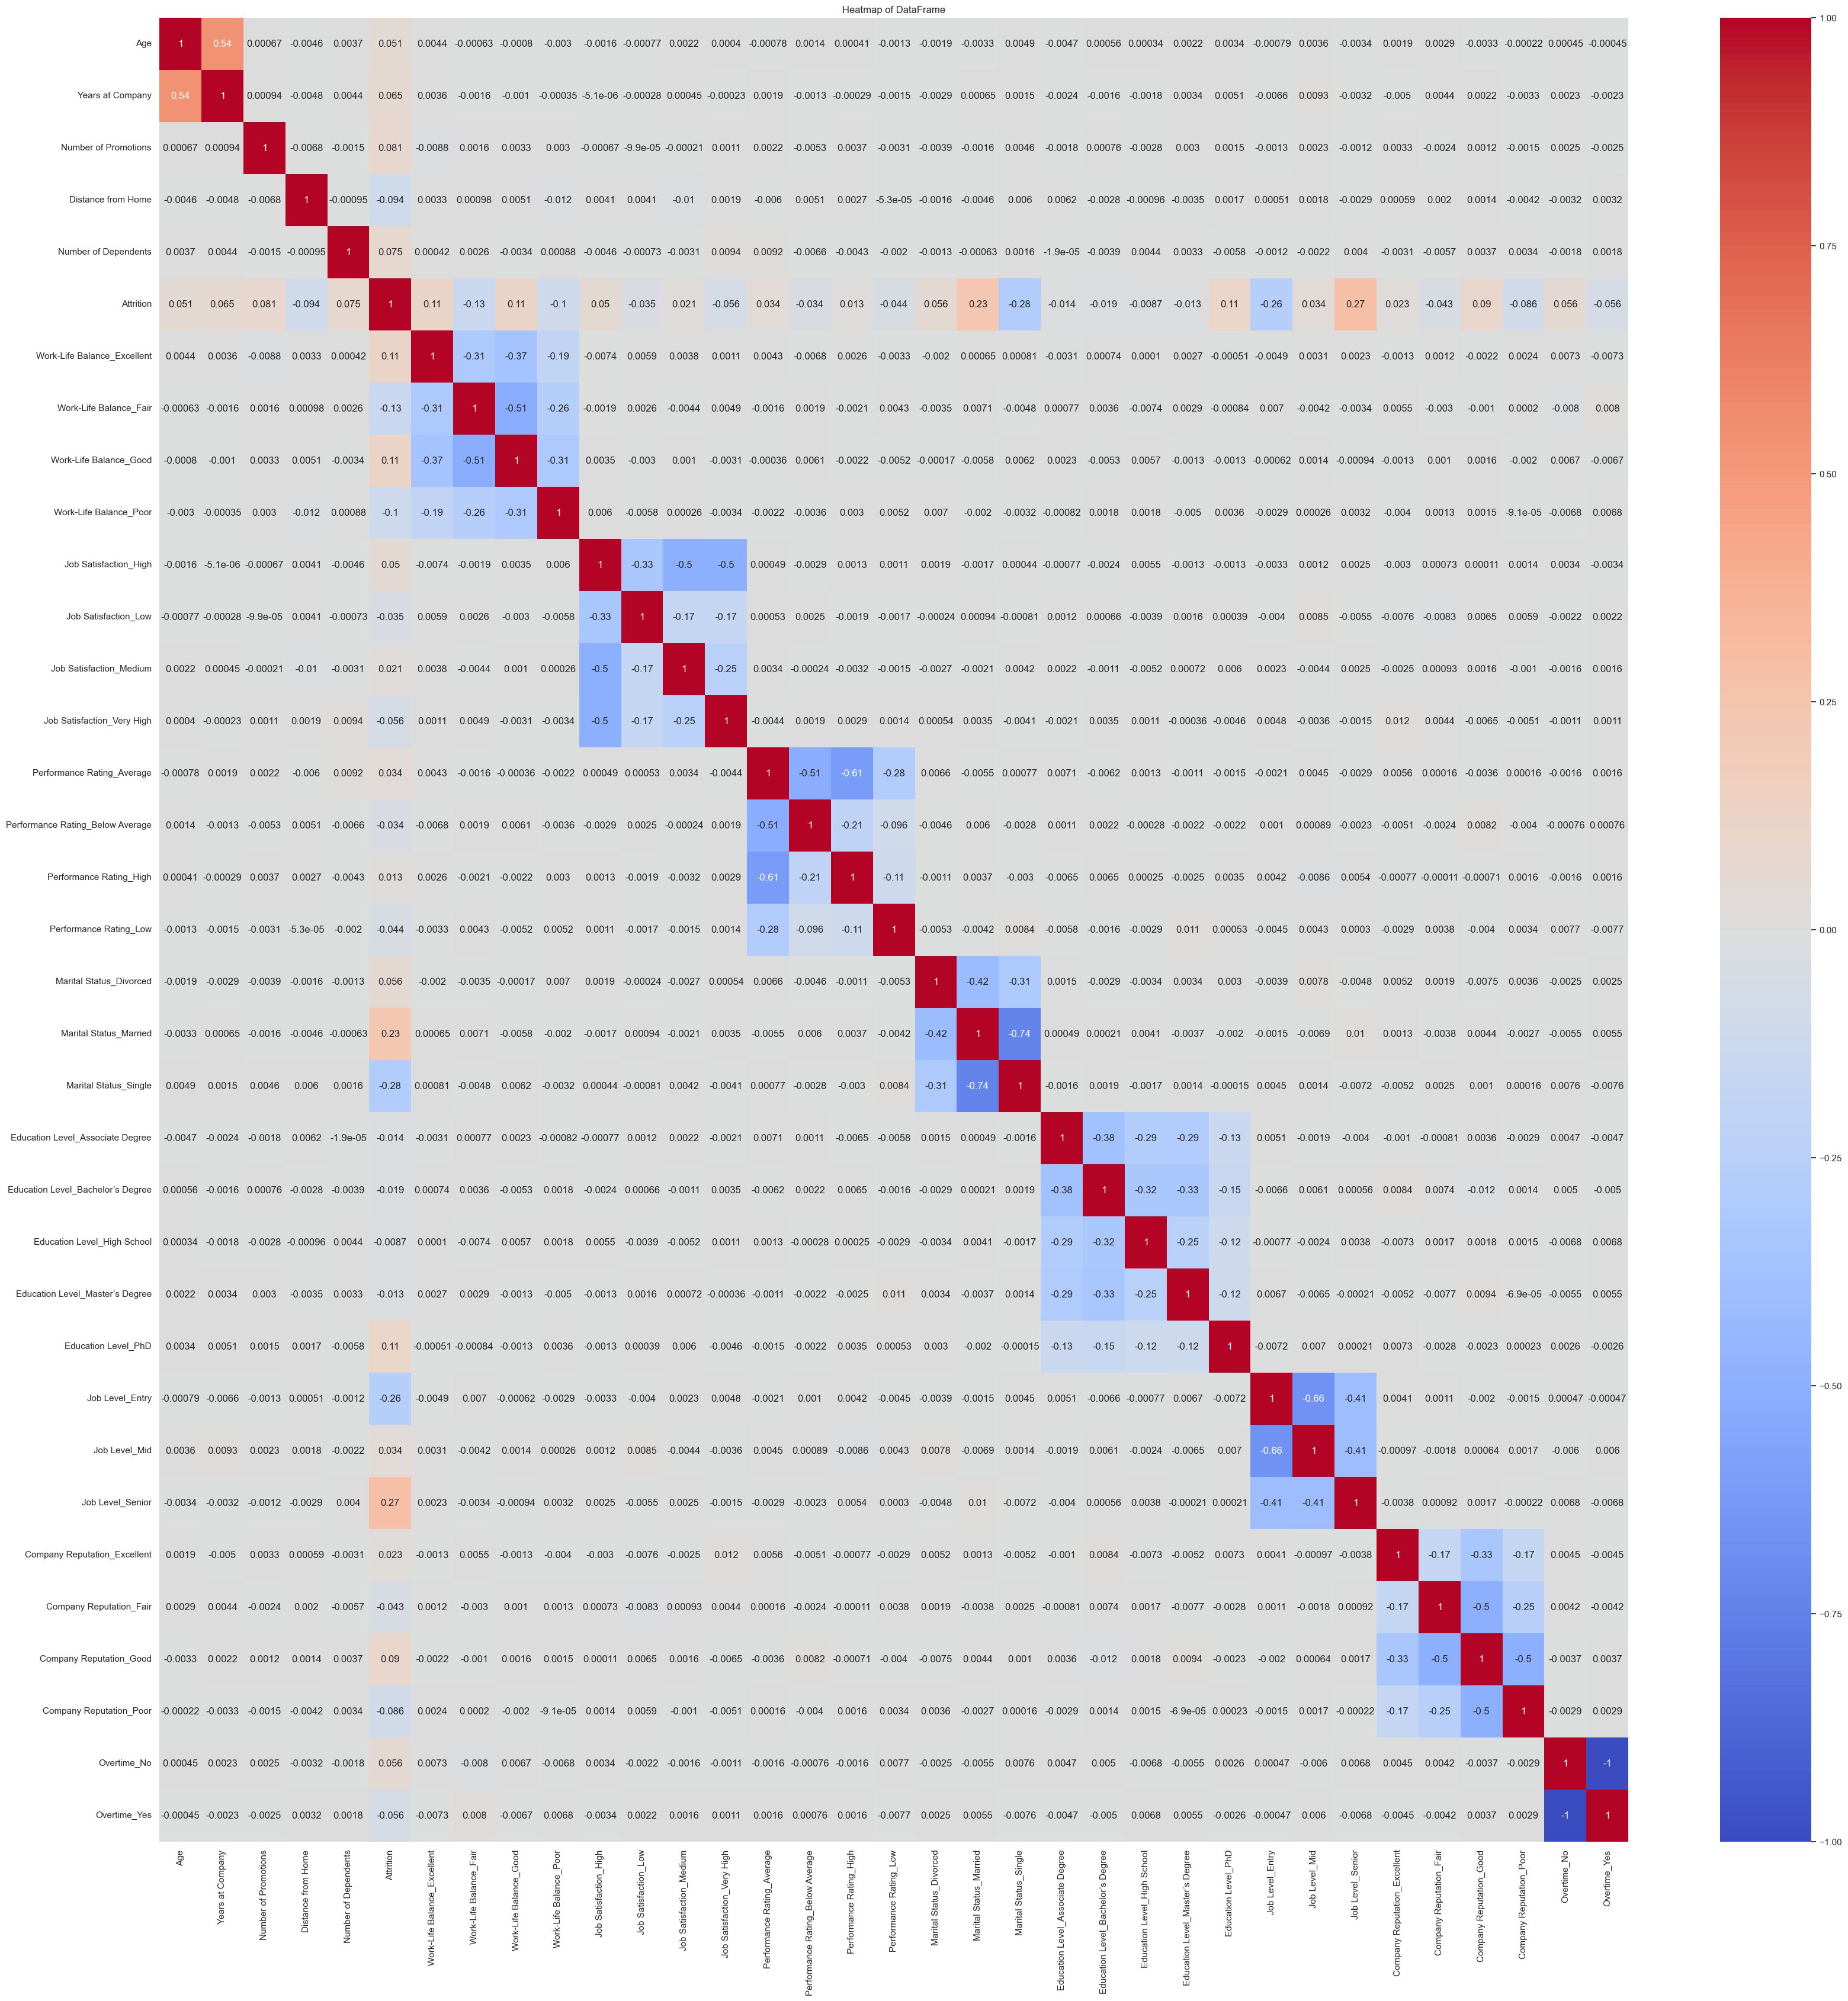

In [77]:
# วาด Heatmap
plt.figure(figsize=(40,40))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of DataFrame')
plt.show()

In [78]:
data = data.drop((['Job Satisfaction_High',
       'Job Satisfaction_Low', 'Job Satisfaction_Medium',
       'Job Satisfaction_Very High']), axis=1)
print(data.columns)

Index(['Age', 'Years at Company', 'Number of Promotions', 'Distance from Home',
       'Number of Dependents', 'Attrition', 'Work-Life Balance_Excellent',
       'Work-Life Balance_Fair', 'Work-Life Balance_Good',
       'Work-Life Balance_Poor', 'Performance Rating_Average',
       'Performance Rating_Below Average', 'Performance Rating_High',
       'Performance Rating_Low', 'Marital Status_Divorced',
       'Marital Status_Married', 'Marital Status_Single',
       'Education Level_Associate Degree', 'Education Level_Bachelor’s Degree',
       'Education Level_High School', 'Education Level_Master’s Degree',
       'Education Level_PhD', 'Job Level_Entry', 'Job Level_Mid',
       'Job Level_Senior', 'Company Reputation_Excellent',
       'Company Reputation_Fair', 'Company Reputation_Good',
       'Company Reputation_Poor', 'Overtime_No', 'Overtime_Yes'],
      dtype='object')


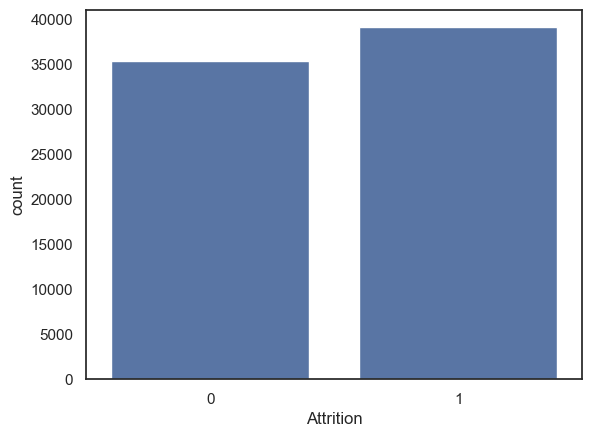

In [79]:
sns.countplot(x='Attrition', data=data)
plt.show()

In [80]:
def custom_plt_confution_matrix(something):
    import matplotlib.pyplot as plt
    import seaborn as sns
    import pandas as pd
    import numpy as np

    sns.set(style='white')
    cm = np.array(something)
    fig, ax = plt.subplots(figsize=(12, 8))
    sns.heatmap(np.eye(2), annot=cm, fmt='g', annot_kws={'size': 50},
                cmap=sns.color_palette(['tomato', 'palegreen'], as_cmap=True), cbar=False,
                yticklabels=['True', 'False'], xticklabels=['True', 'False'], ax=ax)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    ax.tick_params(labelsize=20, length=0)

    ax.set_title('Seaborn Confusion Matrix with labels', size=24, pad=20)
    ax.set_xlabel('Predicted Values', size=20)
    ax.set_ylabel('Actual Values', size=20)

    additional_texts = ['(True Positive)', '(False Negative)', '(False Positive)', '(True Negative)']
    for text_elt, additional_text in zip(ax.texts, additional_texts):
        ax.text(*text_elt.get_position(), '\n' + additional_text, color=text_elt.get_color(),
                ha='center', va='top', size=24)
    plt.tight_layout()
    plt.show()

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
# แบ่งข้อมูล
X = data.drop(columns=['Attrition'])  # Features (ทั้งหมดยกเว้น Attrition)
y = data['Attrition']               # Target column

# แบ่งข้อมูล
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train set size: {X_train.shape}, Test set size: {X_test.shape}")

Train set size: (59598, 30), Test set size: (14900, 30)


In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Accuracy: 0.7331543624161074
              precision    recall  f1-score   support

           0       0.73      0.71      0.72      7096
           1       0.74      0.76      0.75      7804

    accuracy                           0.73     14900
   macro avg       0.73      0.73      0.73     14900
weighted avg       0.73      0.73      0.73     14900

[[5009 2087]
 [1889 5915]]


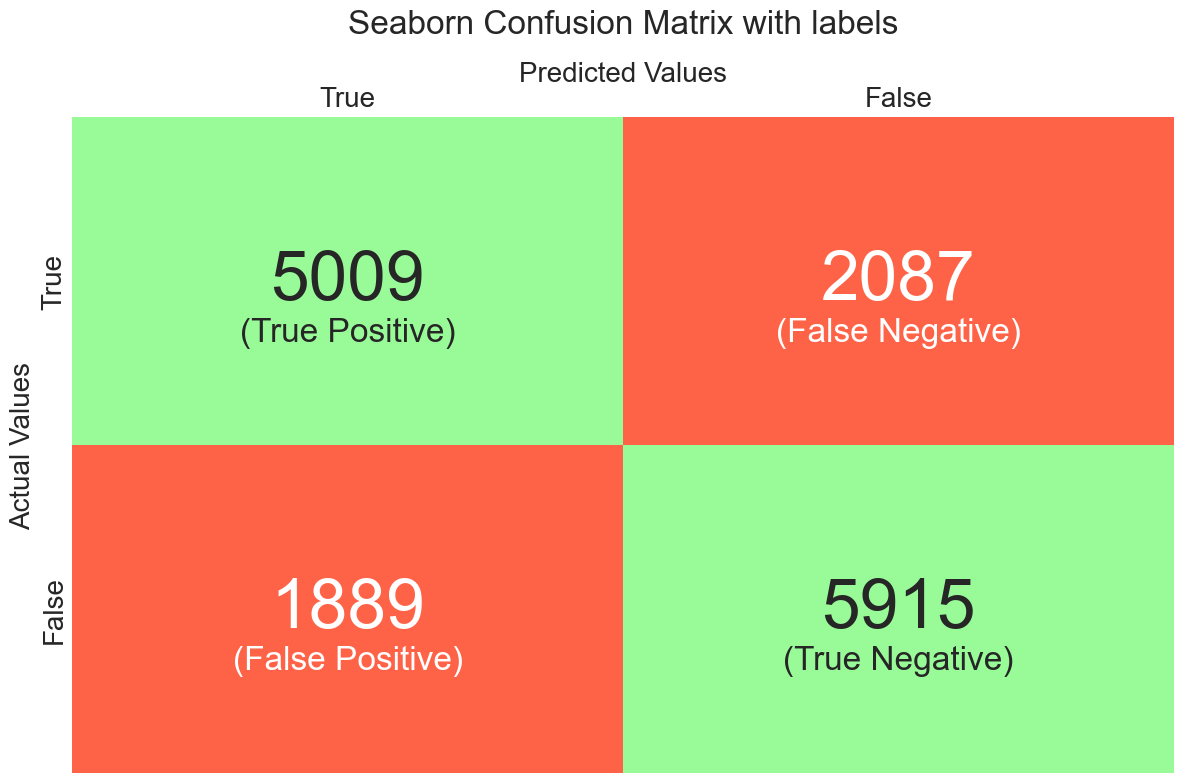

In [84]:
model = LogisticRegression(random_state=42)

# ฝึกโมเดล
model.fit(X_train, y_train)

# ทดสอบโมเดล
y_pred = model.predict(X_test)

# ประเมินโมเดล
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

cftmt_lo = confusion_matrix(y_test, y_pred)
print(cftmt_lo)
custom_plt_confution_matrix(cftmt_lo)

In [85]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# เทรนโมเดลด้วยข้อมูล train
rf_model.fit(X_train, y_train)

# ทำนายผลด้วยข้อมูล test
y_pred_rf = rf_model.predict(X_test)

# ประเมินประสิทธิภาพโมเดล
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Accuracy: 0.7160402684563758

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.70      0.70      7096
           1       0.73      0.73      0.73      7804

    accuracy                           0.72     14900
   macro avg       0.72      0.72      0.72     14900
weighted avg       0.72      0.72      0.72     14900


Confusion Matrix:
 [[4957 2139]
 [2092 5712]]


In [87]:
from sklearn.ensemble import GradientBoostingClassifier

In [88]:
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# เทรนโมเดลด้วยข้อมูล train
gb_model.fit(X_train, y_train)

# ทำนายผลด้วยข้อมูล test
y_pred_gb = gb_model.predict(X_test)

# ประเมินผลโมเดล
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))

gBoostCunMatrix = confusion_matrix(y_test, y_pred_gb)

Accuracy: 0.7377852348993289

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.71      0.72      7096
           1       0.74      0.76      0.75      7804

    accuracy                           0.74     14900
   macro avg       0.74      0.74      0.74     14900
weighted avg       0.74      0.74      0.74     14900


Confusion Matrix:
 [[5040 2056]
 [1851 5953]]


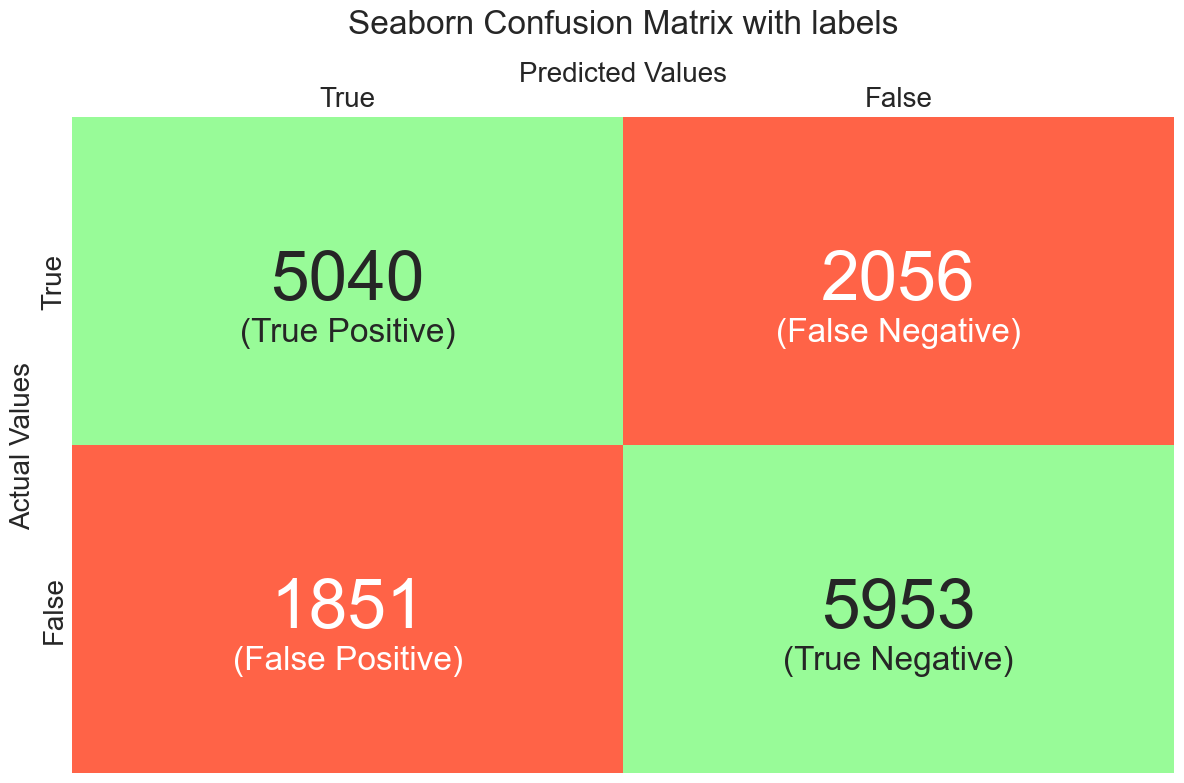

In [89]:
custom_plt_confution_matrix(gBoostCunMatrix)

In [90]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [91]:
k = 5

# สร้างโมเดล Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# สร้าง K-Fold Cross-Validator (Stratified เพื่อให้คลาสสมดุลในแต่ละ Fold)
kfold = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# ใช้ cross_val_score ประเมินโมเดล
scores = cross_val_score(gb_model, X, y, cv=kfold, scoring='accuracy')

# แสดงผลคะแนน
print(f"K-Fold Cross-Validation Results ({k} folds):")
print(f"Scores: {scores}")
print(f"Mean Accuracy: {scores.mean():.2f}")
print(f"Standard Deviation: {scores.std():.2f}")

K-Fold Cross-Validation Results (5 folds):
Scores: [0.72791946 0.72463087 0.73442953 0.7365595  0.7297134 ]
Mean Accuracy: 0.73
Standard Deviation: 0.00


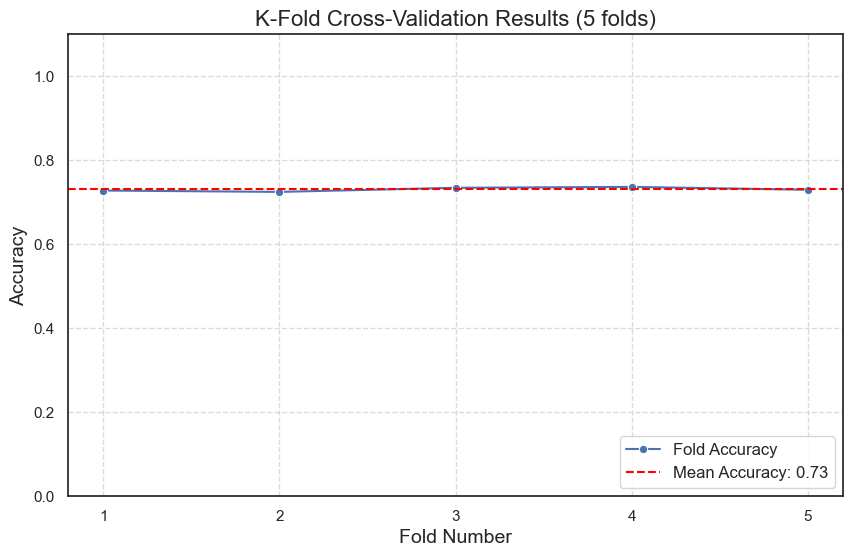

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# สร้างกราฟเพื่อแสดงผลลัพธ์ของแต่ละ Fold
plt.figure(figsize=(10, 6))

# Plot คะแนนของแต่ละ Fold
sns.lineplot(x=np.arange(1, k+1), y=scores, marker='o', label='Fold Accuracy')

# เพิ่มเส้นแสดงค่าเฉลี่ย
mean_accuracy = scores.mean()
plt.axhline(mean_accuracy, color='red', linestyle='--', label=f'Mean Accuracy: {mean_accuracy:.2f}')

# ปรับแต่งกราฟ
plt.title(f'K-Fold Cross-Validation Results ({k} folds)', fontsize=16)
plt.xlabel('Fold Number', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(np.arange(1, k+1))  # แสดงเลข Fold 1 ถึง k
plt.ylim(0, 1.1)  # กำหนดช่วงของแกน y
plt.legend(loc='lower right', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# แสดงกราฟ
plt.show()